In [1]:
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Now you can access your file using its relative path
file_path = '/content/drive/My Drive/MachineLearning_Group/Project/Python_Code_project/SolarIrradiance_processed.csv'

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Reading in  data
solar_ir_df = pd.read_csv(file_path)

In [6]:
solar_ir_df.describe()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode
count,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1314720.0,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06,1.314720e+06
mean,2.020000e+03,6.523549e+00,1.572782e+01,1.150000e+01,30.0,1.569358e+01,4.366212e+01,3.581658e+02,2.483008e+02,1.533958e+00,8.382243e+00,5.261429e+01,2.918992e+02,2.241401e+02,6.802095e+01,8.968456e+01,1.014349e+03,1.553625e+00,1.924700e+00,9.512833e+04
std,1.413827e+00,3.448534e+00,8.799328e+00,6.922189e+00,0.0,6.715500e+00,5.266085e+01,3.912259e+02,3.228307e+02,2.725400e+00,3.899133e+00,7.183775e+01,3.681441e+02,3.088930e+02,2.424006e+01,3.748750e+01,1.045495e+01,6.718073e-01,1.015036e+00,1.508937e+01
min,2.018000e+03,1.000000e+00,1.000000e+00,0.000000e+00,30.0,-2.800000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.820000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.770000e+00,1.444000e+01,9.590000e+02,2.000000e-01,1.000000e-01,9.511000e+04
25%,2.019000e+03,4.000000e+00,8.000000e+00,5.750000e+00,30.0,1.090000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.916000e+01,6.008000e+01,1.012000e+03,1.100000e+00,1.100000e+00,9.511900e+04
50%,2.020000e+03,7.000000e+00,1.600000e+01,1.150000e+01,30.0,1.440000e+01,1.000000e+01,6.100000e+01,1.100000e+01,0.000000e+00,9.000000e+00,7.000000e+00,0.000000e+00,8.000000e+00,7.340000e+01,8.909000e+01,1.017000e+03,1.400000e+00,1.600000e+00,9.512650e+04
75%,2.021000e+03,1.000000e+01,2.300000e+01,1.725000e+01,30.0,1.930000e+01,8.400000e+01,8.010000e+02,4.960000e+02,3.000000e+00,1.110000e+01,9.100000e+01,6.880000e+02,4.310000e+02,8.885000e+01,1.197800e+02,1.020000e+03,1.900000e+00,2.600000e+00,9.513400e+04
max,2.022000e+03,1.200000e+01,3.100000e+01,2.300000e+01,30.0,4.620000e+01,4.380000e+02,1.023000e+03,1.053000e+03,9.000000e+00,2.040000e+01,5.130000e+02,1.023000e+03,1.053000e+03,1.000000e+02,1.653700e+02,1.040000e+03,5.000000e+00,8.800000e+00,9.519200e+04


In [7]:
solar_ir_df.shape

(1314720, 21)

Missing values

In [8]:
# Function to count missing values (including NA, NaNs, and 0)
def count_missing(df):
    missing_counts = df.isna().sum()  # Count missing values (NaN)
    missing_counts = missing_counts.add(df.eq(0).sum(), axis=0)  # Count zeros
    return missing_counts

# Printing the counts of missing values
missing_value_counts = count_missing(solar_ir_df.copy())
print(missing_value_counts)

Year                       0
Month                      0
Day                        0
Hour                   54780
Minute                     0
Temperature               26
Clearsky DHI          634486
Clearsky DNI          634389
Clearsky GHI          634486
Cloud Type            968986
Dew Point               1407
DHI                   634728
DNI                   660578
GHI                   634728
Relative Humidity          0
Solar Zenith Angle         0
Pressure                   0
Precipitable Water         0
Wind Speed                 0
zipcode                    0
hour_day_part              0
dtype: int64


There are a lot of zeros in DHI, DNI, GHI, clearsky DHI, Clearsky DNI and clearsky GHI columns because there is no irradiance during the night time

Need to filter the data on hour_day_part for zero as early_night,late_night and late_night_start_of_day can have multiple 0s

In [9]:
# Total number of columns in the dataset
solar_ir_df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'GHI', 'Relative Humidity', 'Solar Zenith Angle', 'Pressure',
       'Precipitable Water', 'Wind Speed', 'zipcode', 'hour_day_part'],
      dtype='object')

In [10]:
solar_ir_df.shape

(1314720, 21)

In [11]:
# Tabular summary by hour part
# Grouping by 'hour_day_part' and counting rows and the count of zeros in 'GHI'
solar_summary_df = solar_ir_df.groupby('hour_day_part')['GHI'].agg([
    ('Row count', 'count'),
    ('Count_of_Zeros', lambda x: (x == 0).sum()),
    ('Percentage_of_Zeros', lambda x: ((x == 0).sum() / len(x)) * 100)
]).reset_index()

# Display the tabular summary
print(solar_summary_df)

             hour_day_part  Row count  Count_of_Zeros  Percentage_of_Zeros
0                afternoon     219120               0             0.000000
1            early_morning     164340           50910            30.978459
2              early_night     109560          109560           100.000000
3                  evening     109560           14341            13.089631
4             late_evening     109560           76457            69.785506
5               late_night     109560          109560           100.000000
6  late_night_start_of_day     273900          273900           100.000000
7                  morning     219120               0             0.000000


In [12]:
# Filtering data - we need to remove all day part values where >50% are 0
# Defining the hour_day_part values to remove
darkvalues_to_remove = ['early_night', 'late_evening', 'late_night', 'late_night_start_of_day']

# Filtering out rows with the specified hour_day_part values
solar_ir_df_nondark = solar_ir_df[~solar_ir_df['hour_day_part'].isin(darkvalues_to_remove)]

# Display the filtered DataFrame
solar_ir_df_nondark.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DHI,DNI,GHI,Relative Humidity,Solar Zenith Angle,Pressure,Precipitable Water,Wind Speed,zipcode,hour_day_part
5,2018,1,1,5,30,9.3,0,0,0,0,...,0,0,0,96.84,111.57,1025,1.8,0.7,95110,early_morning
6,2018,1,1,6,30,9.1,0,0,0,0,...,0,0,0,96.70,100.18,1025,1.8,0.7,95110,early_morning
7,2018,1,1,7,30,9.6,10,87,12,0,...,10,87,12,92.30,89.01,1026,1.8,0.7,95110,early_morning
8,2018,1,1,8,30,11.0,47,541,145,7,...,66,113,87,85.28,79.54,1026,1.8,0.9,95110,morning
9,2018,1,1,9,30,13.0,63,730,298,4,...,121,292,215,77.34,71.18,1026,1.8,1.3,95110,morning


In [13]:
solar_ir_df_nondark.shape

(712140, 21)

In [14]:
solar_dark_missing_share = ((1314720-712140)*100)/1314720
print(f"Share of data that was filtered out = {solar_dark_missing_share}")

Share of data that was filtered out = 45.833333333333336


~46% of data was mostly related to dark hours with limited or no irradiance (GHI) and has been filtered out. This has been done since having a lot of 0s may affect model interpretation and performance

In [15]:
# Information about the dataset
solar_ir_df_nondark.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712140 entries, 5 to 1314713
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                712140 non-null  int64  
 1   Month               712140 non-null  int64  
 2   Day                 712140 non-null  int64  
 3   Hour                712140 non-null  int64  
 4   Minute              712140 non-null  int64  
 5   Temperature         712140 non-null  float64
 6   Clearsky DHI        712140 non-null  int64  
 7   Clearsky DNI        712140 non-null  int64  
 8   Clearsky GHI        712140 non-null  int64  
 9   Cloud Type          712140 non-null  int64  
 10  Dew Point           712140 non-null  float64
 11  DHI                 712140 non-null  int64  
 12  DNI                 712140 non-null  int64  
 13  GHI                 712140 non-null  int64  
 14  Relative Humidity   712140 non-null  float64
 15  Solar Zenith Angle  712140 non-null  f

In [ ]:
# 1-hot encoding for multiple columns
# Specifying the list of columns to one-hot encode
columns_to_encode = ['Cloud Type','zipcode', 'hour_day_part']

# Performing one-hot encoding for multiple columns and ensure numeric encoding instead of boolean
encoded_df = pd.get_dummies(solar_ir_df_nondark, columns=columns_to_encode, prefix=columns_to_encode, dtype='int')

# Concatenating the encoded columns with the original DataFrame
solar_ir_df_nondark_encoded = pd.concat([solar_ir_df_nondark, encoded_df], axis=1)

# Display the DataFrame with one-hot encoded columns
solar_ir_df_nondark_encoded.head(10)


,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,zipcode_95136,zipcode_95138,zipcode_95139,zipcode_95141,zipcode_95148,zipcode_95192,hour_day_part_afternoon,hour_day_part_early_morning,hour_day_part_evening,hour_day_part_morning
5,2018,1,1,5,30,9.3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,2018,1,1,6,30,9.1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,2018,1,1,7,30,9.6,10,87,12,0,...,0,0,0,0,0,0,0,1,0,0
8,2018,1,1,8,30,11.0,47,541,145,7,...,0,0,0,0,0,0,0,0,0,1
9,2018,1,1,9,30,13.0,63,730,298,4,...,0,0,0,0,0,0,0,0,0,1
10,2018,1,1,10,30,15.1,68,821,418,7,...,0,0,0,0,0,0,0,0,0,1
11,2018,1,1,11,30,16.8,72,859,488,7,...,0,0,0,0,0,0,0,0,0,1
12,2018,1,1,12,30,18.1,75,857,498,3,...,0,0,0,0,0,0,1,0,0,0
13,2018,1,1,13,30,18.6,74,824,448,7,...,0,0,0,0,0,0,1,0,0,0
14,2018,1,1,14,30,18.3,67,764,347,7,...,0,0,0,0,0,0,1,0,0,0


In [16]:
# 1-hot encoding for multiple columns
# Specifying the list of columns to one-hot encode
columns_to_encode = ['Cloud Type', 'zipcode', 'hour_day_part']

# Performing one-hot encoding for multiple columns and ensuring numeric encoding instead of boolean
encoded_df = pd.get_dummies(solar_ir_df_nondark, columns=columns_to_encode, prefix=columns_to_encode, dtype='int')

# Dropping the original columns before concatenating
solar_ir_df_nondark_encoded = pd.concat([solar_ir_df_nondark.drop(columns=columns_to_encode), encoded_df], axis=1)

# Display the DataFrame with one-hot encoded columns
solar_ir_df_nondark_encoded.head(10)


,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,...,zipcode_95136,zipcode_95138,zipcode_95139,zipcode_95141,zipcode_95148,zipcode_95192,hour_day_part_afternoon,hour_day_part_early_morning,hour_day_part_evening,hour_day_part_morning
5,2018,1,1,5,30,9.3,0,0,0,8.8,...,0,0,0,0,0,0,0,1,0,0
6,2018,1,1,6,30,9.1,0,0,0,8.6,...,0,0,0,0,0,0,0,1,0,0
7,2018,1,1,7,30,9.6,10,87,12,8.4,...,0,0,0,0,0,0,0,1,0,0
8,2018,1,1,8,30,11.0,47,541,145,8.6,...,0,0,0,0,0,0,0,0,0,1
9,2018,1,1,9,30,13.0,63,730,298,9.1,...,0,0,0,0,0,0,0,0,0,1
10,2018,1,1,10,30,15.1,68,821,418,9.3,...,0,0,0,0,0,0,0,0,0,1
11,2018,1,1,11,30,16.8,72,859,488,8.9,...,0,0,0,0,0,0,0,0,0,1
12,2018,1,1,12,30,18.1,75,857,498,8.2,...,0,0,0,0,0,0,1,0,0,0
13,2018,1,1,13,30,18.6,74,824,448,7.8,...,0,0,0,0,0,0,1,0,0,0
14,2018,1,1,14,30,18.3,67,764,347,7.6,...,0,0,0,0,0,0,1,0,0,0


In [17]:
solar_ir_df_nondark_encoded.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Dew Point', 'DHI', 'DNI', 'GHI',
       'Relative Humidity', 'Solar Zenith Angle', 'Pressure',
       'Precipitable Water', 'Wind Speed', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'Temperature', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Dew Point', 'DHI', 'DNI', 'GHI', 'Relative Humidity',
       'Solar Zenith Angle', 'Pressure', 'Precipitable Water', 'Wind Speed',
       'Cloud Type_0', 'Cloud Type_2', 'Cloud Type_3', 'Cloud Type_4',
       'Cloud Type_5', 'Cloud Type_6', 'Cloud Type_7', 'Cloud Type_8',
       'Cloud Type_9', 'zipcode_95110', 'zipcode_95111', 'zipcode_95112',
       'zipcode_95113', 'zipcode_95116', 'zipcode_95117', 'zipcode_95118',
       'zipcode_95119', 'zipcode_95120', 'zipcode_95121', 'zipcode_95122',
       'zipcode_95123', 'zipcode_95124', 'zipcode_95125', 'zipcode_95126',
       'zipcode_95127', 'zipcode_95128', 'zipcode_

In [ ]:
# Dropping the original columns that were encoded
solar_ir_df_nondark_encoded = solar_ir_df_nondark_encoded.drop(columns_to_encode,axis=1)
solar_ir_df_nondark_encoded.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,...,zipcode_95136,zipcode_95138,zipcode_95139,zipcode_95141,zipcode_95148,zipcode_95192,hour_day_part_afternoon,hour_day_part_early_morning,hour_day_part_evening,hour_day_part_morning
5,2018,1,1,5,30,9.3,0,0,0,8.8,...,0,0,0,0,0,0,0,1,0,0
6,2018,1,1,6,30,9.1,0,0,0,8.6,...,0,0,0,0,0,0,0,1,0,0
7,2018,1,1,7,30,9.6,10,87,12,8.4,...,0,0,0,0,0,0,0,1,0,0
8,2018,1,1,8,30,11.0,47,541,145,8.6,...,0,0,0,0,0,0,0,0,0,1
9,2018,1,1,9,30,13.0,63,730,298,9.1,...,0,0,0,0,0,0,0,0,0,1
10,2018,1,1,10,30,15.1,68,821,418,9.3,...,0,0,0,0,0,0,0,0,0,1
11,2018,1,1,11,30,16.8,72,859,488,8.9,...,0,0,0,0,0,0,0,0,0,1
12,2018,1,1,12,30,18.1,75,857,498,8.2,...,0,0,0,0,0,0,1,0,0,0
13,2018,1,1,13,30,18.6,74,824,448,7.8,...,0,0,0,0,0,0,1,0,0,0
14,2018,1,1,14,30,18.3,67,764,347,7.6,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Droping the minute column as it is a constant accross
solar_ir_df_nondark_encoded = solar_ir_df_nondark_encoded.drop(columns=['Minute'])

In [ ]:
solar_ir_df_nondark_encoded.dtypes

Year                             int64
Month                            int64
Day                              int64
Hour                             int64
Temperature                    float64
                                ...   
zipcode_95192                    int64
hour_day_part_afternoon          int64
hour_day_part_early_morning      int64
hour_day_part_evening            int64
hour_day_part_morning            int64
Length: 77, dtype: object

In [ ]:
solar_ir_df_nondark_encoded.head(5)

,Year,Month,Day,Hour,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,...,zipcode_95136,zipcode_95138,zipcode_95139,zipcode_95141,zipcode_95148,zipcode_95192,hour_day_part_afternoon,hour_day_part_early_morning,hour_day_part_evening,hour_day_part_morning
5,2018,1,1,5,9.3,0,0,0,8.8,0,...,0,0,0,0,0,0,0,1,0,0
6,2018,1,1,6,9.1,0,0,0,8.6,0,...,0,0,0,0,0,0,0,1,0,0
7,2018,1,1,7,9.6,10,87,12,8.4,10,...,0,0,0,0,0,0,0,1,0,0
8,2018,1,1,8,11.0,47,541,145,8.6,66,...,0,0,0,0,0,0,0,0,0,1
9,2018,1,1,9,13.0,63,730,298,9.1,121,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

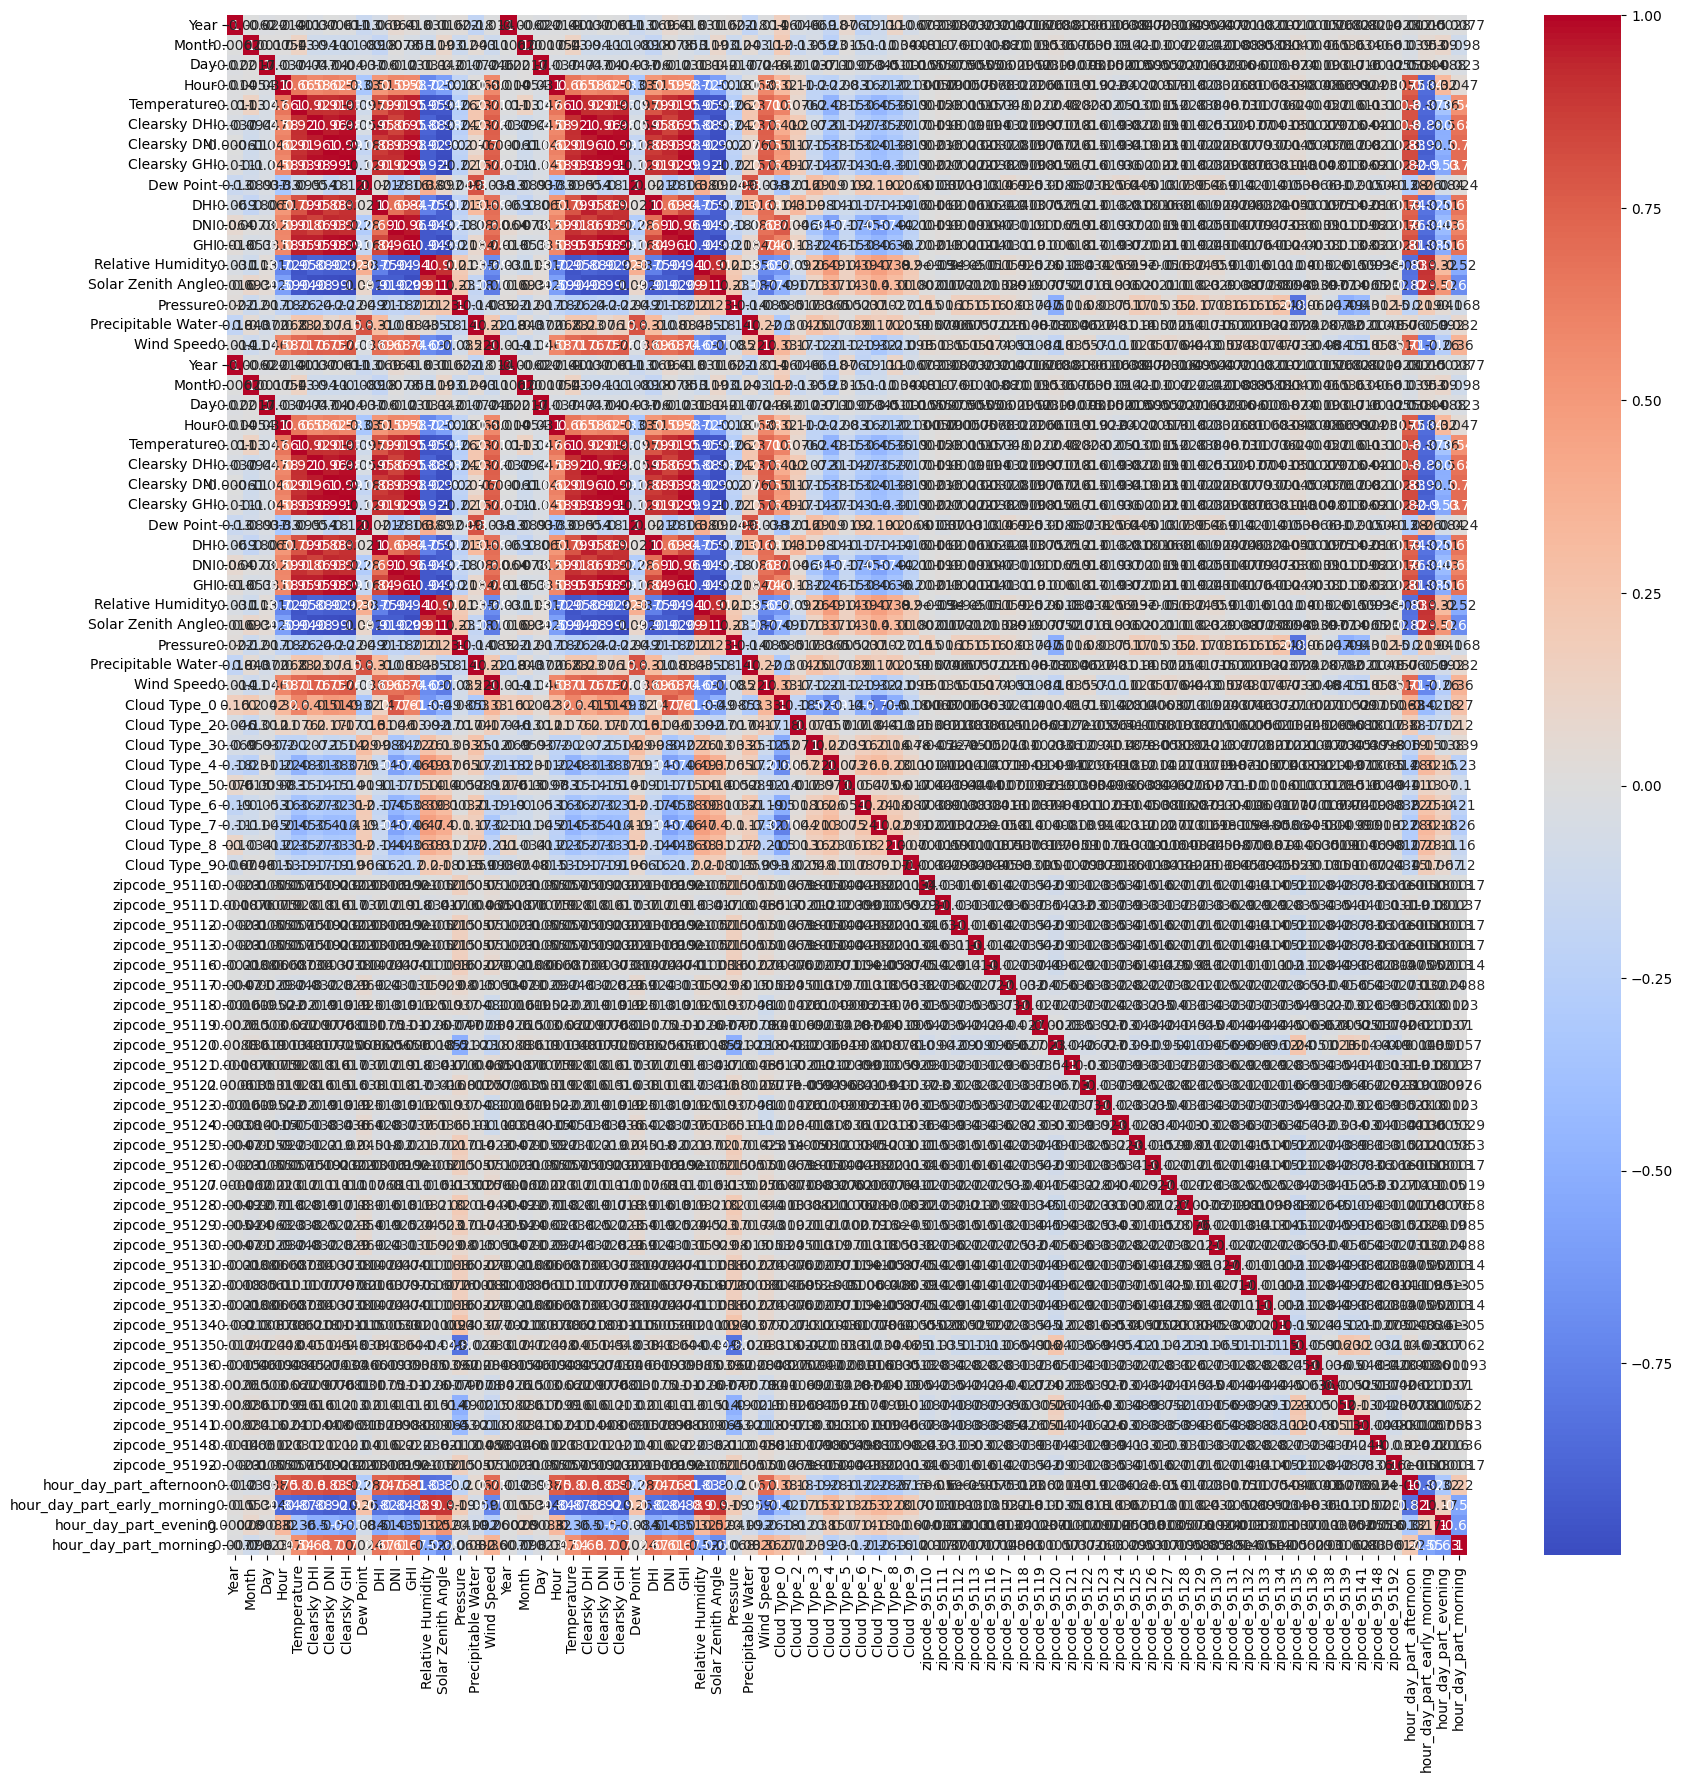

In [ ]:
##HEATMAP FOR CORRELATION ANALYSIS

# Computing the correlation matrix
correlation_matrix = solar_ir_df_nondark_encoded.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix.corr(),annot=True,cmap='coolwarm')

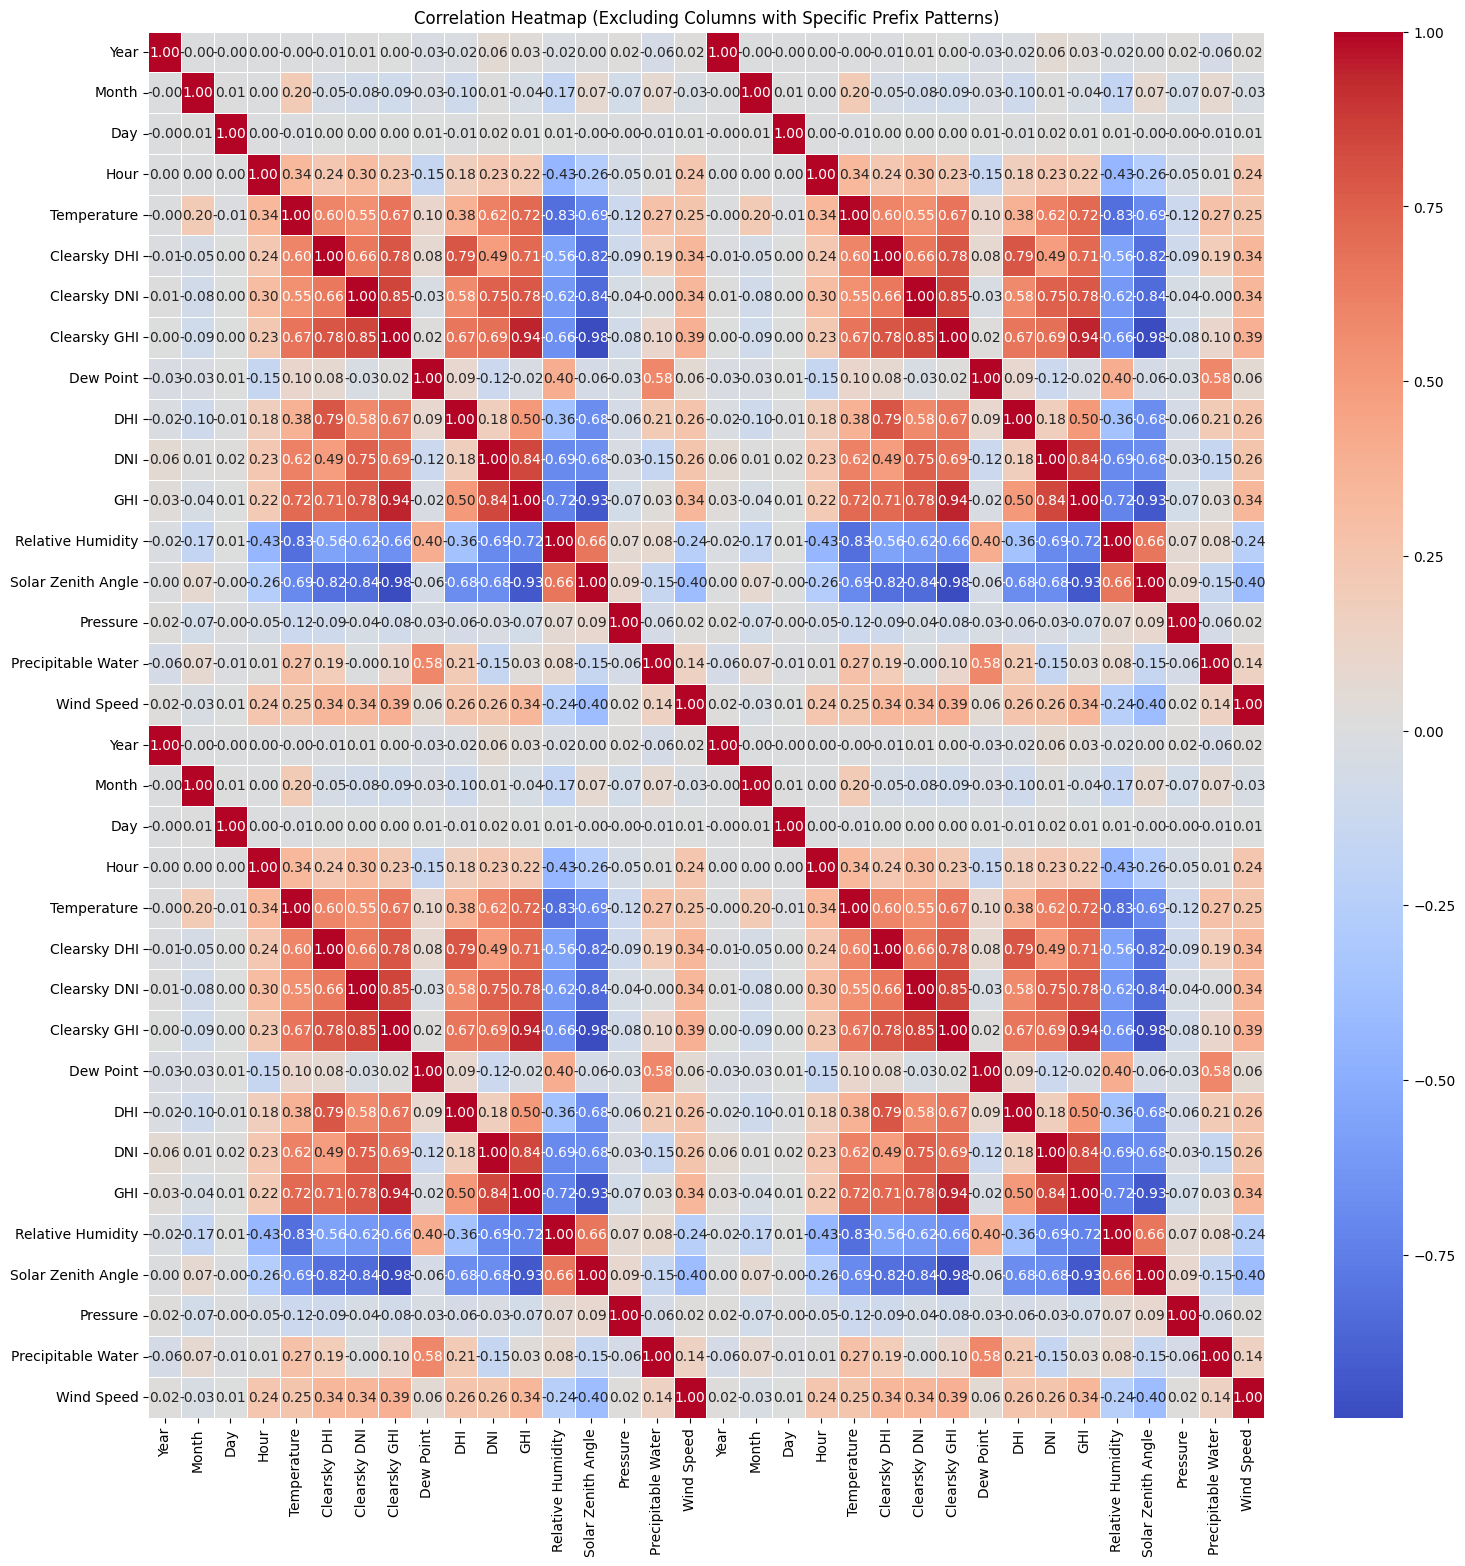

In [ ]:
import re

# Getting columns to exclude based on prefix patterns
columns_to_exclude = [col for col in solar_ir_df_nondark_encoded.columns if any(re.match(pattern, col) for pattern in columns_to_encode)]

# Dropping columns with specified prefix patterns
df_for_correlation = solar_ir_df_nondark_encoded.drop(columns=columns_to_exclude)

# Computing the correlation matrix
correlation_matrix = df_for_correlation.corr()

# Creating a heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Excluding Columns with Specific Prefix Patterns)")
plt.show()
